# Profit Maximization using concept of Price Elasticity of Demand

Price elasticity of demand is an economic measure of the change in the quantity demanded or purchased of a product in relation to its price change. Expressed mathematically, it is: 


$$ Price Elasticity of Demand = \% Change in Quantity Demanded / \% Change in Price$$

Price elasticity is used to understand how supply or demand changes given changes in price to understand the workings of the real economy. For instance, some goods are very inelastic, that is, their prices do not change very much given changes in supply or demand, for example people need to buy gasoline to get to work or travel around the world, and so if oil prices rise, people will likely still buy just the same amount of gas. On the other hand, certain goods are very elastic, their price moves cause substantial changes in its demand or its supply.

Here the dataset used is related to sales of products in a cafe, which sales Burgers, Coffee, Coke and Lemonade. The cafe sales  products individually and as a combination of different products.
Here using the concept of price elasticity of demand we will workout to check the existing pricelist and compare it with optimum price for maximizing the profit 

In [475]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [476]:
products = pd.read_csv('coffee house.csv')
transaction = pd.read_csv('Transaction.csv')
calendar = pd.read_csv('calendar.csv')

In [477]:
products.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [478]:
transaction.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [479]:
calendar.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


### Exploring the product data

In [480]:
products.isnull().sum()

SELL_ID          0
SELL_CATEGORY    0
ITEM_ID          0
ITEM_NAME        0
dtype: int64

In [481]:
products.describe()

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


In [482]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SELL_ID        11 non-null     int64 
 1   SELL_CATEGORY  11 non-null     int64 
 2   ITEM_ID        11 non-null     int64 
 3   ITEM_NAME      11 non-null     object
dtypes: int64(3), object(1)
memory usage: 480.0+ bytes


In [483]:
products.describe(include=['object'])

,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


#### Burger is the top item being sold

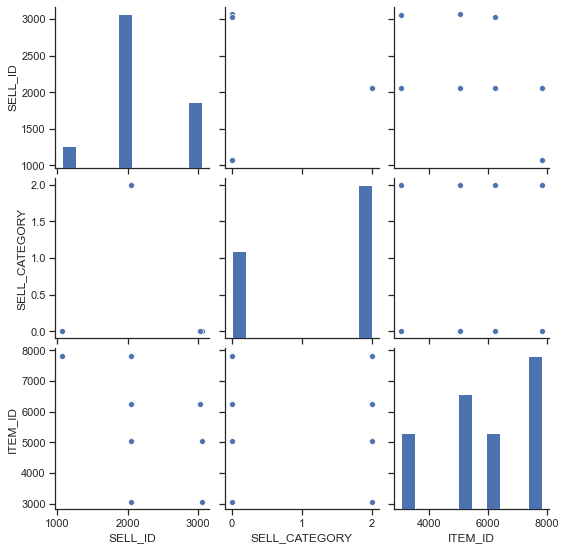

In [484]:
sns.pairplot(products)

#### Basically there is 2 type of sales categoeries 0 & 2 {0 for single and 2 for combination}
#### There are four unique item id

 ### Exploring the transaction data

In [485]:
transaction.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [486]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CALENDAR_DATE  5404 non-null   object 
 1   PRICE          5404 non-null   float64
 2   QUANTITY       5404 non-null   int64  
 3   SELL_ID        5404 non-null   int64  
 4   SELL_CATEGORY  5404 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 211.2+ KB


In [487]:
transaction.isnull().sum()

CALENDAR_DATE    0
PRICE            0
QUANTITY         0
SELL_ID          0
SELL_CATEGORY    0
dtype: int64

In [488]:
transaction.describe()

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


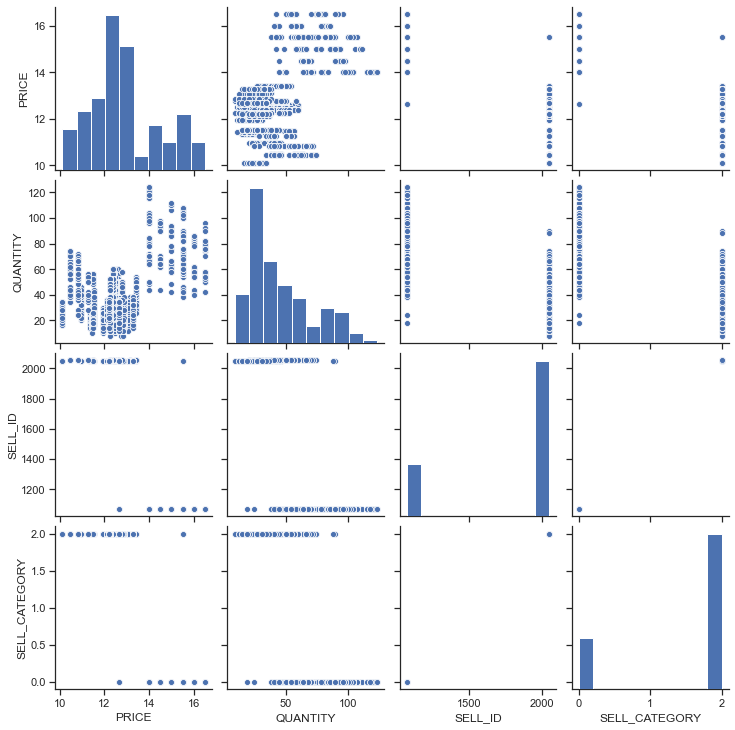

In [489]:
sns.pairplot(transaction)

#### Here we can interesting relation between price and quantity
#### There are two groups in term of quantity sold i.e lower quantity, lower price and higher quantity higher price
####  We can expect such pattern, may be cause of difference between price of coffee and lemonade (lower price) comapred to burger

 ### Exploring the calender date information

In [490]:
calendar.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [491]:
calendar.describe()

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


In [492]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        1349 non-null   object 
 1   YEAR                 1349 non-null   int64  
 2   HOLIDAY              105 non-null    object 
 3   IS_WEEKEND           1349 non-null   int64  
 4   IS_SCHOOLBREAK       1349 non-null   int64  
 5   AVERAGE_TEMPERATURE  1349 non-null   float64
 6   IS_OUTDOOR           1349 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 73.9+ KB


In [493]:
calendar.describe()

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


In [494]:
calendar.describe(include=['object'])

,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


#### There are 8 unique holidays, and out of which common is Luner New Year

In [495]:
calendar.isnull().sum()

CALENDAR_DATE             0
YEAR                      0
HOLIDAY                1244
IS_WEEKEND                0
IS_SCHOOLBREAK            0
AVERAGE_TEMPERATURE       0
IS_OUTDOOR                0
dtype: int64

In [496]:
calendar['HOLIDAY'].unique()

array(['New Year', nan, 'Luner New Year', 'Qing Ming Festival',
       'Labor Day', 'Dragon Boat Festivel', 'Mid-Autumn Day',
       'National Day', 'WWII Celebration'], dtype=object)

#### There are 1244 missing value in HOLIDAY
#### From the dataset it can be observed, where there is holiday it is mentioned, so we can replace the missing value as No Holiday or normal day

In [497]:
calendar['HOLIDAY']=calendar['HOLIDAY'].fillna("Normal Day")

In [498]:
calendar.isnull().sum()

CALENDAR_DATE          0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
dtype: int64

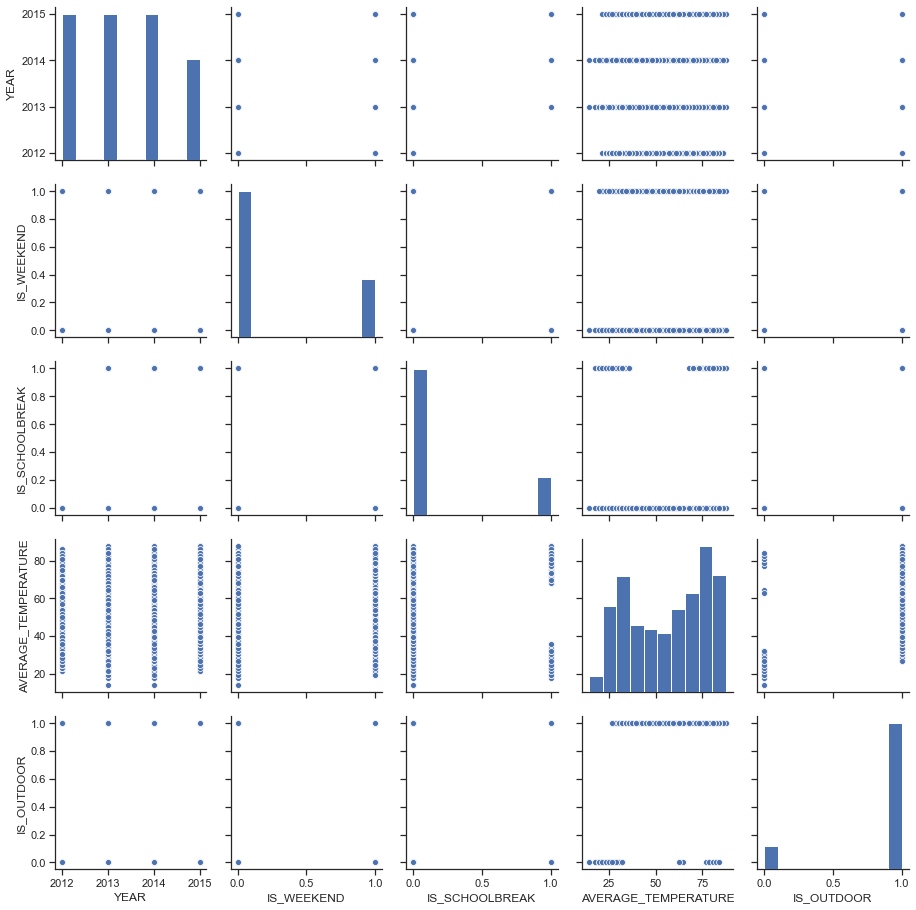

In [499]:
sns.pairplot(calendar)

In [500]:
calendar['CALENDAR_DATE'].min()

'1/1/12'

In [501]:
products

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


In [502]:
products_sell= pd.concat([products.SELL_ID, pd.get_dummies(products.ITEM_NAME)],axis=1)
print(products_sell)

    SELL_ID  BURGER  COFFEE  COKE  LEMONADE
0      1070       1       0     0         0
1      3055       0       1     0         0
2      3067       0       0     1         0
3      3028       0       0     0         1
4      2051       1       0     0         0
5      2051       0       0     1         0
6      2052       1       0     0         0
7      2052       0       0     0         1
8      2053       1       0     0         0
9      2053       0       0     1         0
10     2053       0       1     0         0


#### Here we can see that SELL_ID is not unique in the table, we  can group SELL_ID to see the the products sold under similar ID

In [503]:
products_sell.groupby(products_sell.SELL_ID).sum()

,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,
1070,1,0,0,0
2051,1,0,1,0
2052,1,0,0,1
2053,1,1,1,0
3028,0,0,0,1
3055,0,1,0,0
3067,0,0,1,0


#### Merging products and transaction data on common SELL_ID

In [504]:
new_df=pd.merge(products,transaction, on = 'SELL_ID')

In [505]:
new_df.shape

(10808, 8)

In [506]:
new_df.head()

,SELL_ID,SELL_CATEGORY_x,ITEM_ID,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,SELL_CATEGORY_y
0,1070,0,7821,BURGER,01/01/12,15.5,46,0
1,1070,0,7821,BURGER,01/02/12,15.5,70,0
2,1070,0,7821,BURGER,01/03/12,15.5,62,0
3,1070,0,7821,BURGER,01/04/12,15.5,88,0
4,1070,0,7821,BURGER,01/05/12,15.5,104,0


In [507]:
new_df.drop(columns=['SELL_CATEGORY_y','ITEM_ID'])

,SELL_ID,SELL_CATEGORY_x,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.50,46
1,1070,0,BURGER,01/02/12,15.50,70
2,1070,0,BURGER,01/03/12,15.50,62
3,1070,0,BURGER,01/04/12,15.50,88
4,1070,0,BURGER,01/05/12,15.50,104
...,...,...,...,...,...,...
10803,2053,2,COFFEE,09/06/15,11.26,54
10804,2053,2,COFFEE,09/07/15,11.26,50
10805,2053,2,COFFEE,09/08/15,11.26,50
10806,2053,2,COFFEE,09/09/15,11.26,54


In [508]:
new_df_grouped = new_df.groupby(['SELL_ID', 'SELL_CATEGORY_x', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

In [509]:
new_df_grouped=new_df_grouped.reset_index()

In [510]:
new_df_grouped.head()

,SELL_ID,SELL_CATEGORY_x,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


 #### Now, merging above data with calendar data on CALENDAR_DATE as combined data

In [511]:
calendar.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,Normal Day,0,0,32.0,1
4,1/5/12,2012,Normal Day,0,0,24.8,0


In [512]:
combined_data=pd.merge(new_df_grouped,calendar, on='CALENDAR_DATE')

In [513]:
combined_data.head()

,SELL_ID,SELL_CATEGORY_x,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,Normal Day,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,Normal Day,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,Normal Day,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,Normal Day,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,Normal Day,0,0,26.6,0


In [514]:
combined_data.shape

(6696, 12)

#### Now lets sepearate the trasaction data, which happened in normal day (not any holiday), not on weekend, not during school break to check the trasaction during combined data and non holiday days

In [515]:
normal_day_trans=combined_data[(combined_data['HOLIDAY']=='Normal Day') & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_SCHOOLBREAK']==0)]

In [516]:
normal_day_trans.head()

,SELL_ID,SELL_CATEGORY_x,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,Normal Day,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,Normal Day,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,Normal Day,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,Normal Day,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,Normal Day,0,0,26.6,0


In [517]:
normal_day_trans.shape

(3768, 12)

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

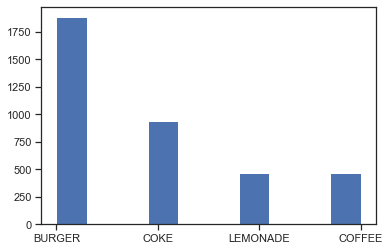

In [518]:
plt.hist(normal_day_trans.ITEM_NAME)

(array([3348.,    0.,    0., 1674.,    0.,    0.,  837.,    0.,    0.,
         837.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

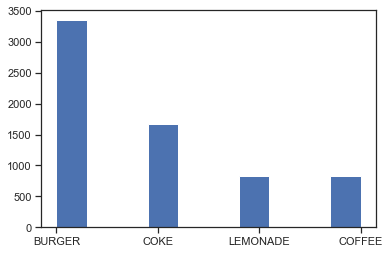

In [519]:
plt.hist(combined_data.ITEM_NAME)

####  BURGER being sold highest, followed by COKE, while LEMONADE & COFFEE are almost similar

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

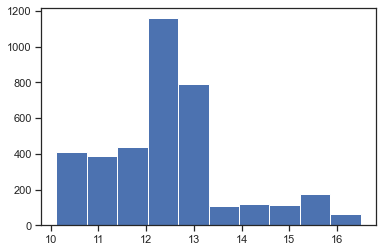

In [520]:
plt.hist(normal_day_trans.PRICE)

(array([ 621.,  723.,  830., 2043., 1429.,  213.,  244.,  153.,  296.,
         144.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

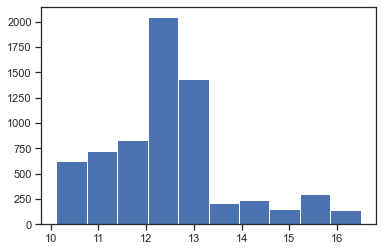

In [521]:
plt.hist(combined_data.PRICE)

Text(0.5, 1.0, 'Price vs Quantity (Combined Data)')

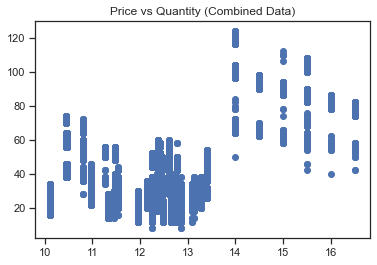

In [522]:
plt.scatter(combined_data['PRICE'],combined_data['QUANTITY'])
plt.title("Price vs Quantity (Combined Data)")

Text(0.5, 1.0, 'Price vs Quantity (Non Holiday Data)')

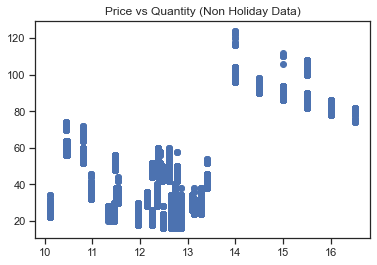

In [523]:
plt.scatter(normal_day_trans['PRICE'],normal_day_trans['QUANTITY'])
plt.title("Price vs Quantity (Non Holiday Data)")

#### From the above two graphs we can see that some transaction  happened on special holidays only

#### Now lets study this by comparing price and quantity for different items

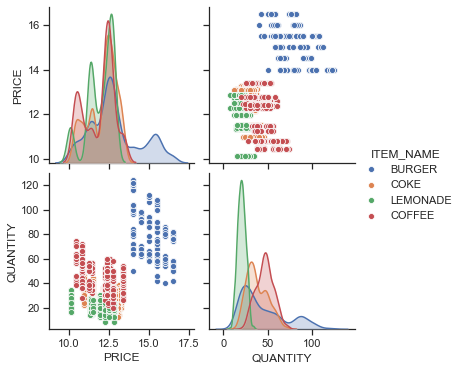

In [524]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']],hue='ITEM_NAME',plot_kws={'alpha':1})

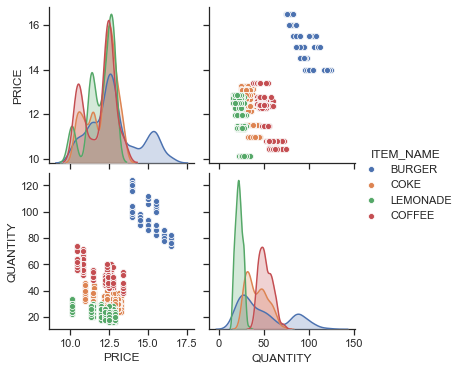

In [525]:
sns.pairplot(normal_day_trans[['PRICE','QUANTITY','ITEM_NAME']],hue='ITEM_NAME',plot_kws={'alpha':1})

#### From this pairplot, we can see the price difference between BURGER and others in the blue  cluster

#### Now we will analyze Burger independently

In [526]:
burger=combined_data[combined_data['ITEM_NAME']=='BURGER']

In [527]:
burger.head()

,SELL_ID,SELL_CATEGORY_x,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,Normal Day,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,Normal Day,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,Normal Day,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,Normal Day,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.50,70,2013,Normal Day,1,0,30.2,0


In [528]:
burger.describe()

,SELL_ID,SELL_CATEGORY_x,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1806.500000,1.500000,12.858572,44.974313,2013.351254,0.284349,0.200717,56.255914,0.878136
std,425.282579,0.866155,1.565046,25.747886,1.062567,0.451171,0.400596,19.996348,0.327177
min,1070.000000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.250000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


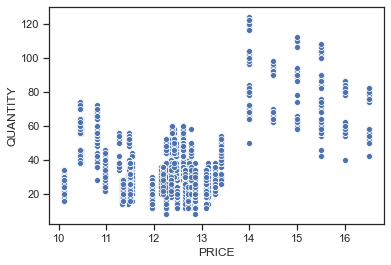

In [529]:
sns.scatterplot(x=burger.PRICE, y=burger.QUANTITY)

In [530]:
burger.SELL_ID.unique()

array([1070, 2051, 2052, 2053], dtype=int64)

#### SELL_ID representing the different combination in which burger is sold

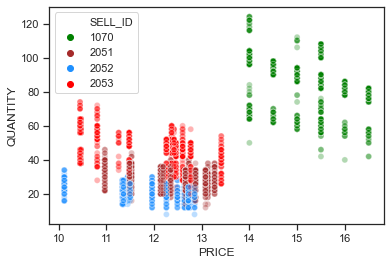

In [531]:
sns.scatterplot(x=burger.PRICE, y=burger.QUANTITY, hue=burger.SELL_ID,alpha=0.3,palette=['green','brown','dodgerblue','red'])

#### Now we will study individual SELL_ID

In [532]:
burger_sid_1070=combined_data[(combined_data['ITEM_NAME']=='BURGER') & (combined_data['SELL_ID']==1070)]

In [533]:
burger_sid_1070.describe()

,SELL_ID,SELL_CATEGORY_x,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


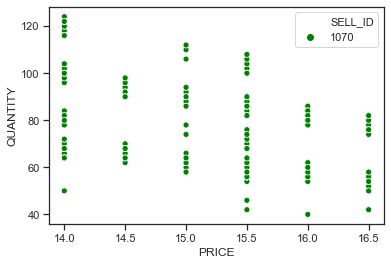

In [534]:
sns.scatterplot(x=burger_sid_1070.PRICE, y=burger_sid_1070.QUANTITY, alpha=1,hue=burger_sid_1070.SELL_ID, palette=['green'])

#### Clearly SELL_ID distinguishing data into different categories

### Regression Model for Burger

In [535]:
reg_burger=ols("QUANTITY~PRICE",data=burger_sid_1070).fit()
print(reg_burger.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.45e-32
Time:                        22:34:16   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

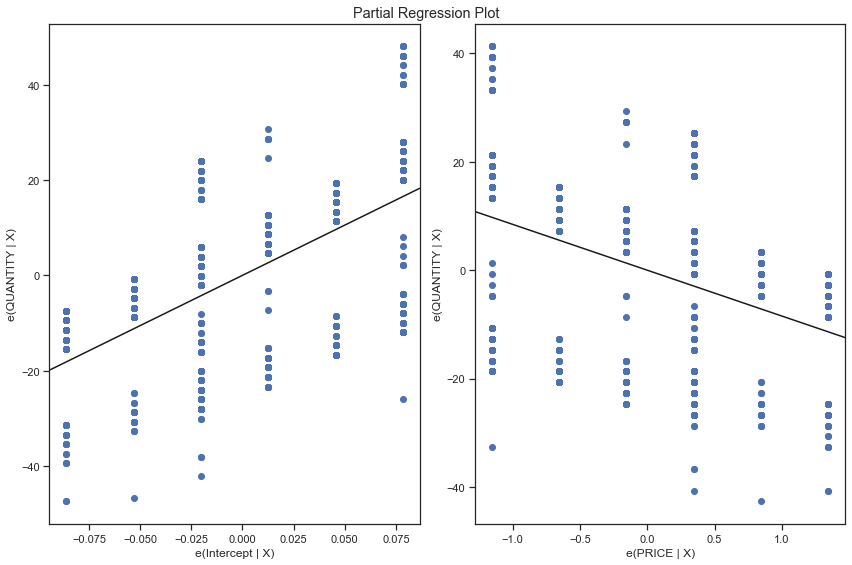

In [536]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_partregress_grid(reg_burger, fig=fig)

#### The graph in the right is the graph between price and quantity, which clearly capture the price elasticity i.e as the price increases the quantity decreses
#### In right graph we can see there is huge variation, which is the reason for low R-Square value

#### Now let's capture the same model and graph for normal day data

In [537]:
burger=normal_day_trans[normal_day_trans['ITEM_NAME']=='BURGER']

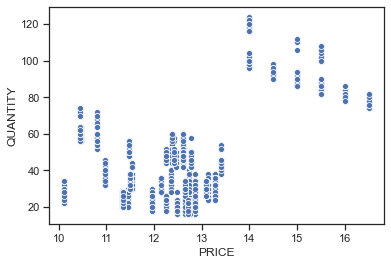

In [538]:
sns.scatterplot(x=burger.PRICE, y=burger.QUANTITY)

In [539]:
burger.SELL_ID.unique()

array([1070, 2051, 2052, 2053], dtype=int64)

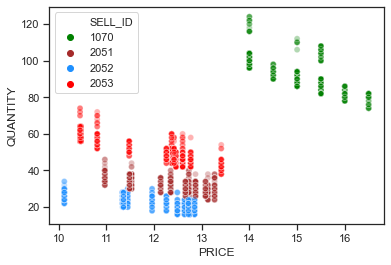

In [540]:
sns.scatterplot(x=burger.PRICE, y=burger.QUANTITY, hue=burger.SELL_ID,alpha=0.3,palette=['green','brown','dodgerblue','red'])

In [541]:
burger_sid_1070=normal_day_trans[(normal_day_trans['ITEM_NAME']=='BURGER') & (normal_day_trans['SELL_ID']==1070)]

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           7.16e-70
Time:                        22:34:17   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

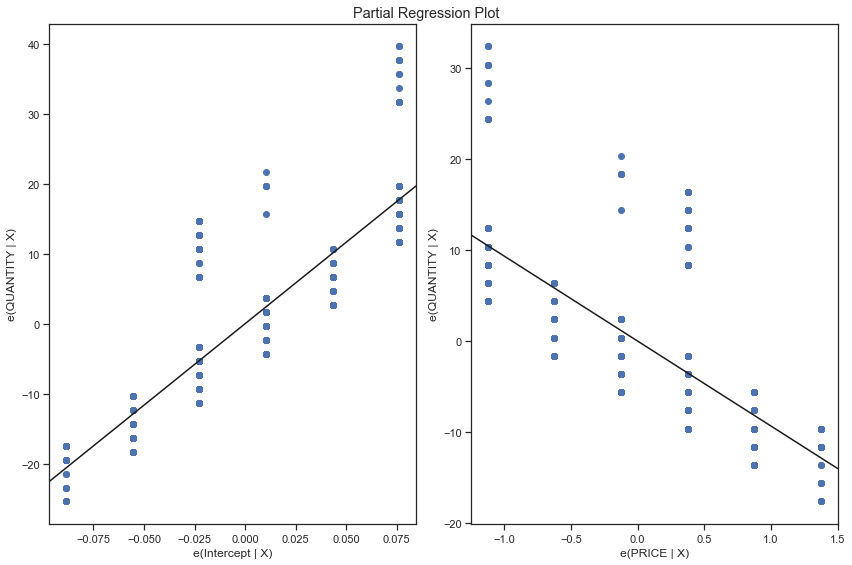

In [542]:
reg_burger=ols("QUANTITY~PRICE",data=burger_sid_1070).fit()
print(reg_burger.summary())
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_partregress_grid(reg_burger, fig=fig)

#### Now the R Square value is improved from previous model, the variation also decresed.
#### Looking at the graph on the right, it can be seen that there are two seperate groups.
#### Now to explore more about this variation, we can study the impact of some other variable

#### Let's consider the data on Normal Day (No Holiday), No Weekend, No School Break. but addional considering the condition where IS_OUTDOOR is 1

In [543]:
normal_day_trans_2 = combined_data[(combined_data['HOLIDAY']=='Normal Day') & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_OUTDOOR']==1)]

#### Again selecting only Burger, SELL_ID = 1070 

In [544]:
burger_sid_1070 = normal_day_trans_2[(normal_day_trans_2['ITEM_NAME'] == 'BURGER') & (normal_day_trans_2['SELL_ID'] == 1070)]

#### Modeling the data 

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          5.51e-153
Time:                        22:34:17   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

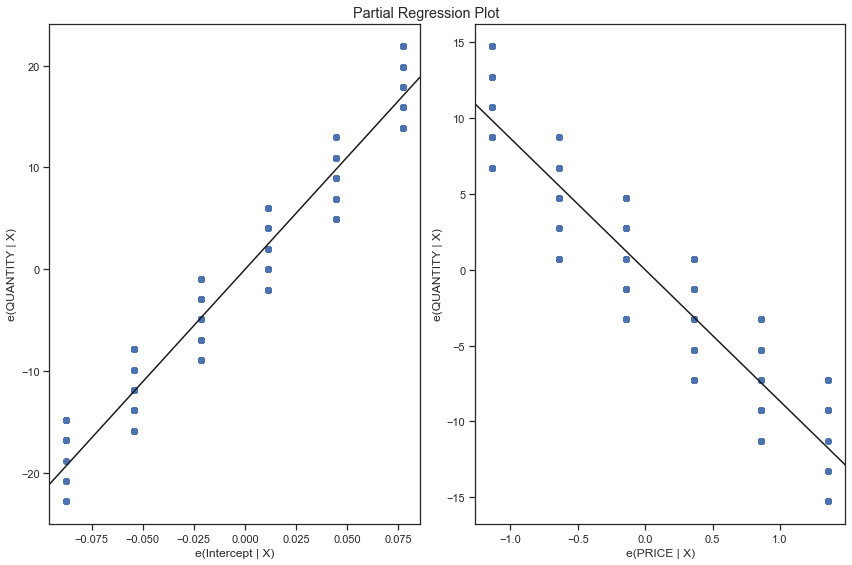

In [545]:
reg_burger=ols("QUANTITY~PRICE",data=burger_sid_1070).fit()
print(reg_burger.summary())
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_partregress_grid(reg_burger, fig=fig)

#### It is clear from the new graph on the right, of the two cluster which were generated earlier, one was for the outdoor 0 (upper) and this is for outdoor 1
#### Now the R-Square is improved

#### So from this we can say in this cafe for the item Burger, with sell id of 1070, the price coeff and thus the elasticity is -8.6586

#### Now checking the trend for another sell id 2051

In [546]:
burger_sid_2051=combined_data[(combined_data['ITEM_NAME']=='BURGER') & (combined_data['SELL_ID']==2051)]

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           4.45e-27
Time:                        22:34:17   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

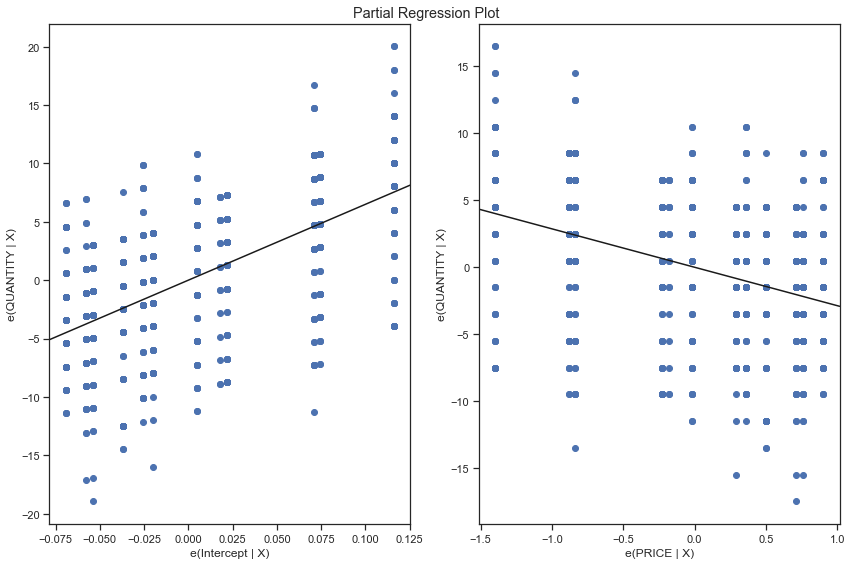

In [547]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_sid_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

#### Again we can see the variance is high and R Square is also low ( in combined dataset)

#### Now taking a general perception about different items Coffee, Coke, and Lemonade

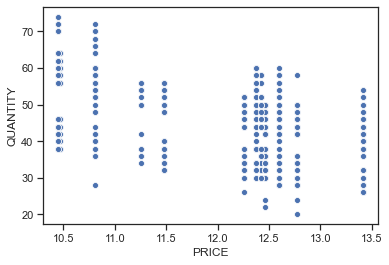

In [548]:
coffee = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']
sns.scatterplot(x = coffee.PRICE, y = coffee.QUANTITY , alpha = 1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           6.20e-62
Time:                        22:34:18   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

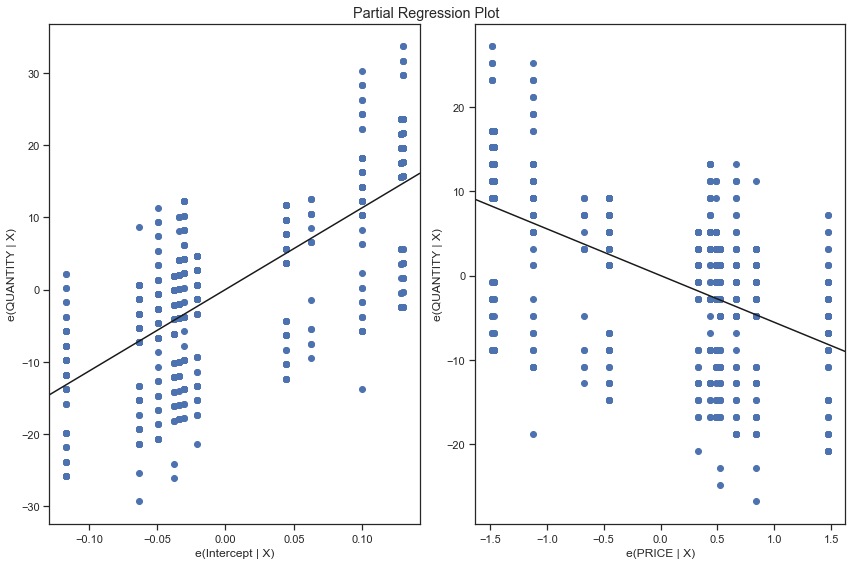

In [549]:
reg_coffee = ols("QUANTITY ~ PRICE", data=coffee).fit()
print(reg_coffee.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg_coffee, fig=fig)

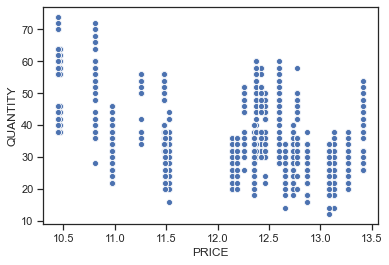

In [550]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          1.94e-104
Time:                        22:34:18   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

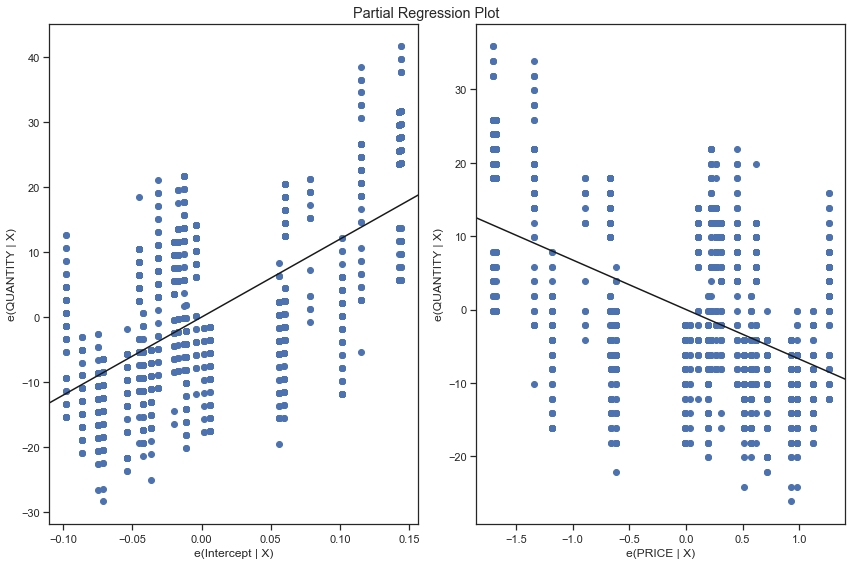

In [551]:
reg_coke = ols("QUANTITY ~ PRICE", data=coke).fit()
print(reg_coke.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg_coke, fig=fig)

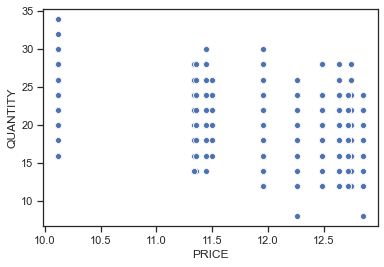

In [552]:
lemonade = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
sns.scatterplot(x = lemonade.PRICE, y = lemonade.QUANTITY , alpha = 1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          1.94e-104
Time:                        22:34:19   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

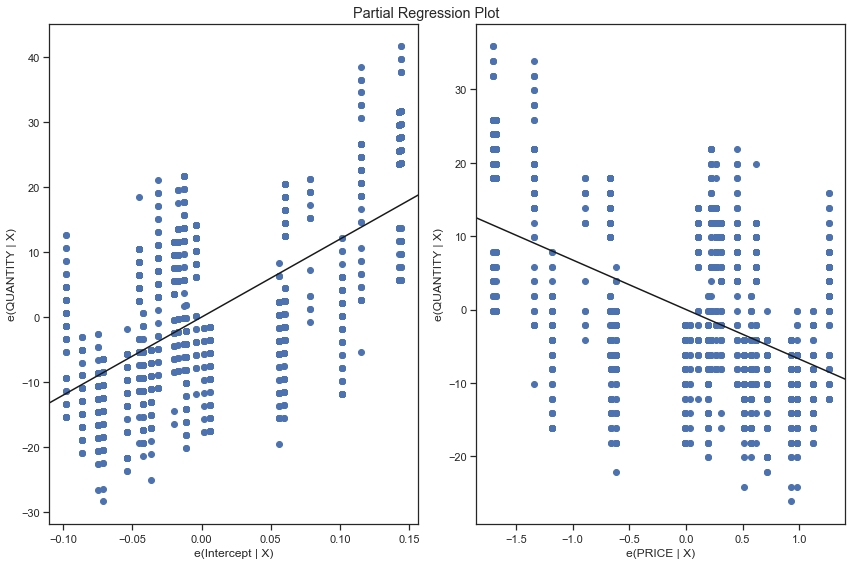

In [553]:
reg_lemonade = ols("QUANTITY ~ PRICE", data=coke).fit()
print(reg_lemonade.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg_lemonade, fig=fig)

#### For Coffee, Coke and Lemonade by using original combined data, the relation between price and quantity is not justified, which can be seen by high variance and lower R Square

#### Let's consider the data on Normal Day (No Holiday), No Weekend, No School Break,  IS_OUTDOOR is 1 and create a generic function to capture elasticity (Price Coefficienct) for different items and sale_id

In [554]:
normal_day_trans_2.head()

,SELL_ID,SELL_CATEGORY_x,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
48,1070,0,BURGER,1/14/14,15.50,86,2014,Normal Day,0,0,28.4,1
49,2051,2,BURGER,1/14/14,13.27,24,2014,Normal Day,0,0,28.4,1
50,2051,2,COKE,1/14/14,13.27,24,2014,Normal Day,0,0,28.4,1
51,2052,2,BURGER,1/14/14,11.96,26,2014,Normal Day,0,0,28.4,1
52,2052,2,LEMONADE,1/14/14,11.96,26,2014,Normal Day,0,0,28.4,1


In [555]:
#lemonade = normal_day_trans_2[normal_day_trans_2['ITEM_NAME'] == 'LEMONADE']

In [556]:
#lemonade.SELL_ID.unique()

In [557]:
elasticities = {}

In [558]:
def regression_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    return price_elasticity, model

In [559]:
burger_sid_1070 = normal_day_trans_2[(normal_day_trans_2['ITEM_NAME'] == 'BURGER') & (normal_day_trans_2['SELL_ID'] == 1070)]

In [560]:
price_elasticity, model_burger_1070 = regression_elasticity(burger_sid_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -8.658581488470569
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          5.51e-153
Time:                        22:34:19   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [561]:
burger_sid_2051 = normal_day_trans_2[(normal_day_trans_2['ITEM_NAME'] == 'BURGER') & (normal_day_trans_2['SELL_ID'] == 2051)]

In [562]:
price_elasticity, model_burger_2051 = regression_elasticity(burger_sid_2051)
elasticities['burger_2051'] = price_elasticity

Price elasticity of the product: -3.618990615456312
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.34e-58
Time:                        22:34:19   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [563]:
burger_sid_2052 = normal_day_trans_2[(normal_day_trans_2['ITEM_NAME'] == 'BURGER') & (normal_day_trans_2['SELL_ID'] == 2052)]
burger_sid_2053 = normal_day_trans_2[(normal_day_trans_2['ITEM_NAME'] == 'BURGER') & (normal_day_trans_2['SELL_ID'] == 2053)]

In [564]:
price_elasticity, model_burger_2052 = regression_elasticity(burger_sid_2052)
elasticities['burger_2052'] = price_elasticity

Price elasticity of the product: -2.856702984559962
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           5.32e-53
Time:                        22:34:19   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [565]:
price_elasticity, model_burger_2053 = regression_elasticity(burger_sid_2053)
elasticities['burger_2053'] = price_elasticity

Price elasticity of the product: -6.164156666230159
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          3.72e-152
Time:                        22:34:19   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [566]:
coffee_sid_2053 = normal_day_trans_2[(normal_day_trans_2['ITEM_NAME'] == 'COFFEE') & (normal_day_trans_2['SELL_ID'] == 2053)]
coke_sid_2053 = normal_day_trans_2[(normal_day_trans_2['ITEM_NAME'] == 'COKE') & (normal_day_trans_2['SELL_ID'] == 2053)]
coke_sid_2051 = normal_day_trans_2[(normal_day_trans_2['ITEM_NAME'] == 'COKE') & (normal_day_trans_2['SELL_ID'] == 2051)]
lemonade_sid_2052 = normal_day_trans_2[(normal_day_trans_2['ITEM_NAME'] == 'LEMONADE') & (normal_day_trans_2['SELL_ID'] == 2052)]

In [567]:
price_elasticity, model_coffee_2053 = regression_elasticity(coffee_sid_2053)
elasticities['coffee_2053'] = price_elasticity

Price elasticity of the product: -6.164156666230159
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          3.72e-152
Time:                        22:34:19   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [568]:
price_elasticity, model_coke_2051 = regression_elasticity(coke_sid_2051)
elasticities['coke_2051'] = price_elasticity

Price elasticity of the product: -3.618990615456312
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.34e-58
Time:                        22:34:19   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [569]:
price_elasticity, model_coke_2053 = regression_elasticity(coke_sid_2053)
elasticities['coke_2053'] = price_elasticity

Price elasticity of the product: -6.164156666230159
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          3.72e-152
Time:                        22:34:19   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [570]:
price_elasticity, model_lemonade_2052 = regression_elasticity(lemonade_sid_2052)
elasticities['lemonade_2052'] = price_elasticity

Price elasticity of the product: -2.856702984559962
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           5.32e-53
Time:                        22:34:19   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


#### The items with sale_id and their price elasticity are as:

In [571]:
elasticities

{'burger_1070': -8.658581488470569,
 'burger_2051': -3.618990615456312,
 'burger_2052': -2.856702984559962,
 'burger_2053': -6.164156666230159,
 'coffee_2053': -6.164156666230159,
 'coke_2051': -3.618990615456312,
 'coke_2053': -6.164156666230159,
 'lemonade_2052': -2.856702984559962}

### Now using this elasticity for individual products, let's work for optimal price for maximum profit

#### Starting with coke_2051

In [572]:
coke_sid_2051.head()

,SELL_ID,SELL_CATEGORY_x,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
50,2051,2,COKE,1/14/14,13.27,24,2014,Normal Day,0,0,28.4,1
90,2051,2,COKE,1/15/15,11.53,36,2015,Normal Day,0,0,32.0,1
122,2051,2,COKE,1/16/15,11.53,32,2015,Normal Day,0,0,32.0,1
450,2051,2,COKE,1/27/12,12.73,28,2012,Normal Day,0,0,32.0,1
578,2051,2,COKE,1/31/12,12.73,30,2012,Normal Day,0,0,32.0,1


In [573]:
#minimum selling price
coke_sid_2051.PRICE.min()

10.97

In [574]:
#maximum selling price
coke_sid_2051.PRICE.max()

13.27

#### Since buying price is not availabe in the data, let's assume it as 9 for this case

In [575]:
coke_sid_2051_buy=9

#### The profit will be calculated using known formula: $$(selling price - buying price) * quantity$$

In [576]:
# since we considered buying price as 9, let's analysing the demand when we start selling from 9.5 (0.5 profit margin) 
##and a maximum selling price as 20
start_price=9.5
end_price=20

#### Creating a dataframe to store price and quantity derived from the model developed above 

In [577]:
df=pd.DataFrame(columns = ["PRICE", "DEMAND","PROFIT"])

In [578]:
df['PRICE']=np.arange(start_price,end_price,0.01)

In [579]:
df['DEMAND']=model_coke_2051.predict(df['PRICE'])

In [580]:
df['PROFIT'] = (df['PRICE'] - coke_sid_2051_buy) * df['DEMAND']

In [581]:
df.head()

,PRICE,DEMAND,PROFIT
0,9.50,41.759021,20.879510
1,9.51,41.722831,21.278644
2,9.52,41.686641,21.677053
3,9.53,41.650451,22.074739
4,9.54,41.614261,22.471701


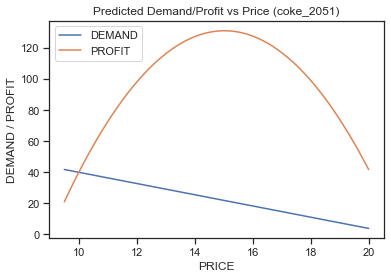

In [582]:
plt.plot(df['PRICE'],df['DEMAND'])
plt.plot(df['PRICE'],df['PROFIT'])
plt.xlabel('PRICE')  
plt.ylabel('DEMAND / PROFIT')
plt.title("Predicted Demand/Profit vs Price (coke_2051)")
plt.legend(["DEMAND", "PROFIT"], loc ='best')

#### Here we can see as price increases, the demand getting decreses.
#### And initially as the price increses, the profit will increase upto a level and then start decresing, we need to find the spot of maximum profit

In [583]:
profit_max=np.where(df['PROFIT']==df['PROFIT'].max())[0][0]

In [584]:
df.loc[[profit_max]]

,PRICE,DEMAND,PROFIT
552,15.02,21.782193,131.128799


#### So, the price to be set for maximum profit is 15.02, and the demand at this price will be 22 nos (for a normal day)

### Now, to calculate optimal price for all of products lets create a function

In [585]:
def optimum_price(data,model,buying_price):
    start_price = data.PRICE.min()-1
    end_price=data.PRICE.max()+5
    df=pd.DataFrame(columns = ["PRICE", "DEMAND","PROFIT"])
    df['PRICE']=np.arange(start_price,end_price,0.01)
    df['DEMAND']=model.predict(df['PRICE'])
    df['PROFIT'] = (df['PRICE'] - buying_price) * df['DEMAND']
    plt.plot(df['PRICE'],df['DEMAND'])
    plt.plot(df['PRICE'],df['PROFIT'])
    plt.xlabel('PRICE')  
    plt.ylabel('DEMAND / PROFIT')
    plt.legend(["DEMAND", "PROFIT"], loc ='best')
    plt.show()
    profit_max=np.where(df['PROFIT']==df['PROFIT'].max())[0][0]
    optimum_point = df.iloc[[profit_max]]
    return optimum_point

In [586]:
combined_data['PRICE'].min()

10.12

In [587]:
combined_data['PRICE'].max()

16.5

In [588]:
buying_price=9

In [589]:
optimum_price_dict={}

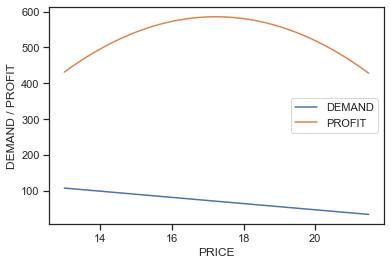

In [590]:
optimum_price_dict['burger_sid_1070'] = optimum_price(burger_sid_1070,model_burger_1070,buying_price)

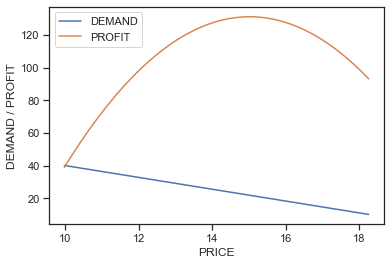

In [591]:
optimum_price_dict['burger_sid_2051'] = optimum_price(burger_sid_2051,model_burger_2051,buying_price)

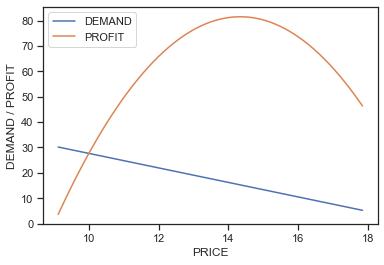

In [592]:
optimum_price_dict['burger_sid_2052'] = optimum_price(burger_sid_2052,model_burger_2052,buying_price)

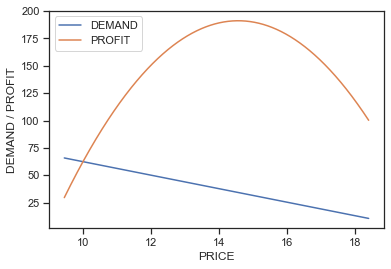

In [593]:
optimum_price_dict['burger_sid_2053'] = optimum_price(burger_sid_2053,model_burger_2053,buying_price)

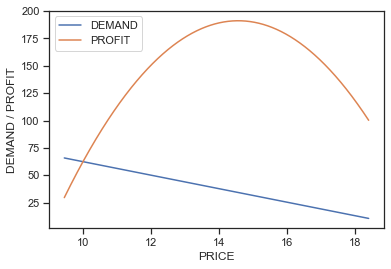

In [594]:
optimum_price_dict['coffee_sid_2053'] = optimum_price(coffee_sid_2053,model_coffee_2053,buying_price)

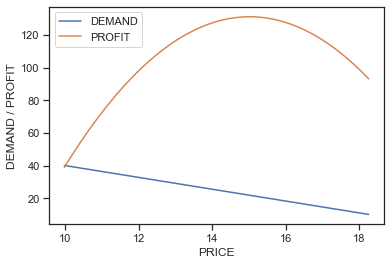

In [595]:
optimum_price_dict['coke_sid_2051'] = optimum_price(coke_sid_2051,model_coke_2051,buying_price)

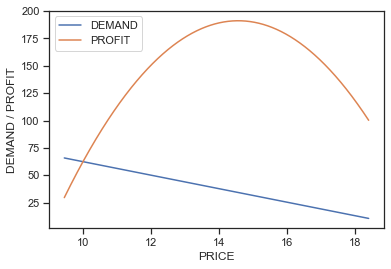

In [596]:
optimum_price_dict['coke_sid_2053'] = optimum_price(coke_sid_2053,model_coke_2053,buying_price)

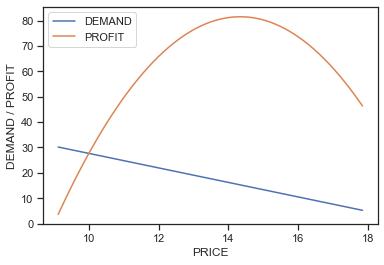

In [597]:
optimum_price_dict['lemonade_sid_2052'] = optimum_price(lemonade_sid_2052,model_lemonade_2052,buying_price)

In [598]:
for keys,values in optimum_price_dict.items():
    print(keys)
    print(values)

burger_sid_1070
     PRICE     DEMAND      PROFIT
422  17.22  71.259194  585.750572
burger_sid_2051
     PRICE     DEMAND      PROFIT
505  15.02  21.782193  131.128799
burger_sid_2052
     PRICE     DEMAND     PROFIT
522  14.34  15.259215  81.484211
burger_sid_2053
     PRICE     DEMAND      PROFIT
512  14.57  34.329951  191.217825
coffee_sid_2053
     PRICE     DEMAND      PROFIT
512  14.57  34.329951  191.217825
coke_sid_2051
     PRICE     DEMAND      PROFIT
505  15.02  21.782193  131.128799
coke_sid_2053
     PRICE     DEMAND      PROFIT
512  14.57  34.329951  191.217825
lemonade_sid_2052
     PRICE     DEMAND     PROFIT
522  14.34  15.259215  81.484211


In [599]:
val_o = list(optimum_price_dict.values())

In [600]:
val_o

[     PRICE     DEMAND      PROFIT
 422  17.22  71.259194  585.750572,
      PRICE     DEMAND      PROFIT
 505  15.02  21.782193  131.128799,
      PRICE     DEMAND     PROFIT
 522  14.34  15.259215  81.484211,
      PRICE     DEMAND      PROFIT
 512  14.57  34.329951  191.217825,
      PRICE     DEMAND      PROFIT
 512  14.57  34.329951  191.217825,
      PRICE     DEMAND      PROFIT
 505  15.02  21.782193  131.128799,
      PRICE     DEMAND      PROFIT
 512  14.57  34.329951  191.217825,
      PRICE     DEMAND     PROFIT
 522  14.34  15.259215  81.484211]

In [601]:
key_o=list(optimum_price_dict.keys())

In [602]:
item_list=[burger_sid_1070.PRICE, burger_sid_2051.PRICE, burger_sid_2052.PRICE, burger_sid_2053.PRICE, coffee_sid_2053.PRICE, coke_sid_2051.PRICE, coke_sid_2053.PRICE, lemonade_sid_2052.PRICE]

#### Comparing this optimized values to the existing record

In [603]:
burger_sid_1070.PRICE.describe()

count    416.000000
mean      15.139423
std        0.709511
min       14.000000
25%       14.500000
50%       15.000000
75%       15.500000
max       16.500000
Name: PRICE, dtype: float64

#### Clearly the mean price for burger (sell id 1070) is 15.14, which is lower than the 17.22.
#### The maximum price (16.5) is also on the lower side compared to optimized price.

In [604]:
burger_sid_2051.PRICE.describe()

count    416.000000
mean      12.301562
std        0.730620
min       10.970000
25%       11.530000
50%       12.350000
75%       12.870000
max       13.270000
Name: PRICE, dtype: float64

#### Clearly the mean price for burger (sell id 2051) is 12.30, which is lower than the 15.02.
#### The maximum price (13.27) is also on the lower side compared to optimized price.

#### Thus we can see, their is a margin to maximize the profit for every combination

In [605]:
mean_price=[]
max_price=[]
def min_max(list):
    for data in list:
        a=data.mean()
        b=data.max()
        mean_price.append(a)
        max_price.append(b)           

In [606]:
min_max(item_list)

In [607]:
existing_pricing=pd.concat([pd.DataFrame(key_o,columns=['Item']),pd.DataFrame(mean_price,columns=['Mean']), pd.DataFrame(max_price,columns=['Max'])],axis=1)

In [608]:
existing_pricing

,Item,Mean,Max
0,burger_sid_1070,15.139423,16.50
1,burger_sid_2051,12.301562,13.27
2,burger_sid_2052,11.970264,12.85
3,burger_sid_2053,11.893726,13.41
4,coffee_sid_2053,11.893726,13.41
5,coke_sid_2051,12.301562,13.27
6,coke_sid_2053,11.893726,13.41
7,lemonade_sid_2052,11.970264,12.85


In [609]:
optimum_price_dict

{'burger_sid_1070':      PRICE     DEMAND      PROFIT
 422  17.22  71.259194  585.750572,
 'burger_sid_2051':      PRICE     DEMAND      PROFIT
 505  15.02  21.782193  131.128799,
 'burger_sid_2052':      PRICE     DEMAND     PROFIT
 522  14.34  15.259215  81.484211,
 'burger_sid_2053':      PRICE     DEMAND      PROFIT
 512  14.57  34.329951  191.217825,
 'coffee_sid_2053':      PRICE     DEMAND      PROFIT
 512  14.57  34.329951  191.217825,
 'coke_sid_2051':      PRICE     DEMAND      PROFIT
 505  15.02  21.782193  131.128799,
 'coke_sid_2053':      PRICE     DEMAND      PROFIT
 512  14.57  34.329951  191.217825,
 'lemonade_sid_2052':      PRICE     DEMAND     PROFIT
 522  14.34  15.259215  81.484211}

#### Clearly we can see the optimized price for different items (and combination) is currently on the lower side, and there is scope for maximizing the profit, if we keep the price at optimum price.

### Conclusion:
#### This is the price the cafe should set on it's item to earn maximum profit based on it's previous sales data.
#### The study made here is on data filtered for non holiday, non weekend, non school holiday.
#### The holiday would have different impact, and same pricing cannot pe used without analysis.
#### In the similar manner pricing startegy for holiday can be prepared.